In [1]:
import pandas as pd
from sklearn.cluster import KMeans
police = pd.read_csv('result.csv')
police.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


,Unnamed: 0,Date_Occured,Zone ID,Lattitude,Longitude,Type,Time_Intrvl,average,census,population,white population,over18,male,median,household,family household,vacant,rent,area
0,0,2017-01-08 17:00:00,226.0,36.848522,-75.990597,DESTRUCTION OF PROPERTY,215,0.0,442.00,6587,3743,5018,3258,29.8,2804,1483,233,1662,6555252
1,1,2016-06-29 07:27:00,127.0,36.828849,-76.069027,LARCENY,222,0.0,454.07,4434,2869,3254,2236,32.9,1466,1136,90,378,9154779
2,2,2016-07-15 22:40:00,227.0,36.848395,-75.975093,ASSAULT,63,0.0,440.03,5469,4882,4559,2861,43.9,2513,1352,881,905,2819638
3,3,2017-07-23 21:00:00,320.0,36.838597,-76.070625,DESTRUCTION OF PROPERTY,20,0.0,428.02,4549,2469,3537,2183,29.1,1937,1118,145,1273,1913514
4,4,2017-03-05 12:55:00,124.0,36.763408,-76.021602,LARCENY,2,0.0,454.17,9169,7532,6455,4462,36.8,3017,2569,80,313,9118267


In [2]:
population_density = police['population']/police['area']*1000
population_distribution = police['white population']/police['population']
age_distribution = police['over18']/police['population']
sex_distribution = police['male']/police['population']
population_perhoushold = police['population']/police['household']
family_density = police['family household']/police['household']
vacant_rate = police['vacant']/police['household']
rent_rate = police['rent']/police['household']

In [3]:
popu_replace=pd.DataFrame(population_density).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'population_density'}, inplace = True)

popu_replace=pd.DataFrame(population_distribution).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'population_distribution'}, inplace = True)

popu_replace=pd.DataFrame(age_distribution).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'age_distribution'}, inplace = True)

popu_replace=pd.DataFrame(sex_distribution).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'sex_distribution'}, inplace = True)

popu_replace=pd.DataFrame(population_perhoushold).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'population_perhoushold'}, inplace = True)

popu_replace=pd.DataFrame(family_density).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'family_density'}, inplace = True)

popu_replace=pd.DataFrame(vacant_rate).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'vacant_rate'}, inplace = True)

popu_replace=pd.DataFrame(rent_rate).astype(float)
police=pd.merge(police,popu_replace,how='left',left_index=True,right_index=True)
police.rename(columns = {0:'rent_rate'}, inplace = True)

police=police.drop(["Unnamed: 0","Zone ID","census","white population","male","over18","family household","vacant","rent"],axis=1)
police.head()

,Date_Occured,Lattitude,Longitude,Type,Time_Intrvl,average,population,median,household,area,population_density,population_distribution,age_distribution,sex_distribution,population_perhoushold,family_density,vacant_rate,rent_rate
0,2017-01-08 17:00:00,36.848522,-75.990597,DESTRUCTION OF PROPERTY,215,0.0,6587,29.8,2804,6555252,1.004843,0.568240,0.761804,0.494611,2.349144,0.528887,0.083096,0.592725
1,2016-06-29 07:27:00,36.828849,-76.069027,LARCENY,222,0.0,4434,32.9,1466,9154779,0.484337,0.647046,0.733875,0.504285,3.024557,0.774898,0.061392,0.257844
2,2016-07-15 22:40:00,36.848395,-75.975093,ASSAULT,63,0.0,5469,43.9,2513,2819638,1.939611,0.892668,0.833608,0.523130,2.176283,0.538002,0.350577,0.360127
3,2017-07-23 21:00:00,36.838597,-76.070625,DESTRUCTION OF PROPERTY,20,0.0,4549,29.1,1937,1913514,2.377302,0.542757,0.777534,0.479886,2.348477,0.577181,0.074858,0.657202
4,2017-03-05 12:55:00,36.763408,-76.021602,LARCENY,2,0.0,9169,36.8,3017,9118267,1.005564,0.821464,0.704003,0.486640,3.039112,0.851508,0.026516,0.103745


In [5]:
police_pre = police.drop(['Date_Occured','Type'],axis = 1)
police_zs = (police_pre -police_pre.mean())/police_pre.std()
police_zs.head()

,Lattitude,Longitude,Time_Intrvl,average,population,median,household,area,population_density,population_distribution,age_distribution,sex_distribution,population_perhoushold,family_density,vacant_rate,rent_rate
0,0.529215,1.465028,-0.040785,-0.266388,0.970049,-0.873738,1.375919,0.052234,-0.830161,-0.610885,-0.139269,0.136555,-0.160211,-1.078598,-0.075000,1.026797
1,0.025062,0.340023,-0.039574,-0.266388,-0.346729,-0.408160,-0.729647,0.196388,-1.425573,-0.131324,-0.763384,0.460198,0.107292,0.804344,-0.232176,-0.566032
2,0.525961,1.687419,-0.067086,-0.266388,0.286278,1.243892,0.917982,-0.154919,0.239128,1.363387,1.465300,1.090635,-0.228675,-1.008832,1.862043,-0.079533
3,0.274871,0.317101,-0.074526,-0.266388,-0.276395,-0.978868,0.011550,-0.205167,0.739807,-0.765964,0.212240,-0.356042,-0.160476,-0.708961,-0.134655,1.333477
4,-1.651971,1.020290,-0.077641,-0.266388,2.549204,0.177568,1.711110,0.194363,-0.829337,0.930081,-1.430918,-0.130096,0.113057,1.390713,-0.484735,-1.298991


In [6]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(police['Type'])
one_hot=pd.DataFrame(one_hot).astype(float)
# Drop column B as it is now encoded
#result2 = result.drop('Type',axis = 1)
#police_zs = police_zs.drop('0',axis = 1)
# Join the encoded df
police_zs=pd.merge(police_zs,one_hot,how='left',left_index=True,right_index=True)

In [7]:
one_hot.head()

,ASSAULT,COUNTERFEITING/ FORGERY,CRUELTY TO ANIMALS,DESTRUCTION OF PROPERTY,DRUG VIOLATIONS,FRAUD,HARASSING COMMUNICATION,LARCENY,Others,ROBBERY,TRESPASS OF REAL PROPERTY,UNAUTHORIZED USE OF AUTO,VIOLATE PROTECTIVE ORDER,WEAPON LAW VIOLATIONS
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#police_zs['ASSAULT']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['COUNTERFEITING/ FORGERY']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['CRUELTY TO ANIMALS']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['DESTRUCTION OF PROPERTY']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['DRUG VIOLATIONS']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['FRAUD']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['HARASSING COMMUNICATION']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['LARCENY']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['Others']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['ROBBERY']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['TRESPASS OF REAL PROPERTY']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['UNAUTHORIZED USE OF AUTO']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['VIOLATE PROTECTIVE ORDER']=pd.DataFrame(police_zs['ASSAULT']).astype(float)
#police_zs['WEAPON LAW VIOLATIONS']=pd.DataFrame(police_zs['ASSAULT']).astype(float)


police_zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80292 entries, 0 to 80291
Data columns (total 30 columns):
Lattitude                    80292 non-null float64
Longitude                    80292 non-null float64
Time_Intrvl                  80292 non-null float64
average                      80292 non-null float64
population                   80292 non-null float64
median                       80292 non-null float64
household                    80292 non-null float64
area                         80292 non-null float64
population_density           80292 non-null float64
population_distribution      80292 non-null float64
age_distribution             80292 non-null float64
sex_distribution             80292 non-null float64
population_perhoushold       80292 non-null float64
family_density               80292 non-null float64
vacant_rate                  80292 non-null float64
rent_rate                    80292 non-null float64
ASSAULT                      80292 non-null float64
COUNTER

In [9]:
police_zs.to_csv("zs.csv")

PermissionError: [Errno 13] Permission denied: 'zs.csv'

In [43]:
 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
 
#police_nodate = police.drop('Date_Occured',axis=1)    
#police_zs = (police_nodate -police_nodate.mean())/police_nodate.std()
 
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(police_zs)

    meandistortions.append(sum(np.min(cdist(police_zs, kmeans.cluster_centers_, 'euclidean'), axis=1)) / police_zs.shape[0])

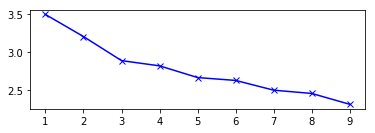

In [44]:
plt.figure()
plt.grid(True)

plt2 = plt.subplot(2,1,2)

plt2.plot(K, meandistortions, 'bx-') 
plt.show()

In [69]:
#police_zs = (police -police.mean())/police.std()

k = 3
iteration = 2000
Kmodel = KMeans(n_clusters = k, n_jobs= 1, max_iter =iteration)
Kmodel.fit(police_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
police_zs.head()

,Lattitude,Longitude,Time_Intrvl,average,population,median,household,area,population_density,population_distribution,...,DRUG VIOLATIONS,FRAUD,HARASSING COMMUNICATION,LARCENY,Others,ROBBERY,TRESPASS OF REAL PROPERTY,UNAUTHORIZED USE OF AUTO,VIOLATE PROTECTIVE ORDER,WEAPON LAW VIOLATIONS
0,0.529215,1.465028,-0.040785,-0.266388,0.970049,-0.873738,1.375919,0.052234,-0.830161,-0.610885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025062,0.340023,-0.039574,-0.266388,-0.346729,-0.408160,-0.729647,0.196388,-1.425573,-0.131324,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.525961,1.687419,-0.067086,-0.266388,0.286278,1.243892,0.917982,-0.154919,0.239128,1.363387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274871,0.317101,-0.074526,-0.266388,-0.276395,-0.978868,0.011550,-0.205167,0.739807,-0.765964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.651971,1.020290,-0.077641,-0.266388,2.549204,0.177568,1.711110,0.194363,-0.829337,0.930081,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn import metrics
y_pred = Kmodel.fit_predict(police_zs)
metrics.calinski_harabaz_score(police_zs, y_pred)

14041.936207976309

In [72]:
# visulization
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#pca = PCA()
#data =pca.fit_transform(police_zs)
data = police
data = pd.DataFrame(data,index=police_zs.index) 

In [73]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data1 = police_zs
data1 = pd.DataFrame(data,index=police_zs.index) 
corr_matrix = data1.corr()

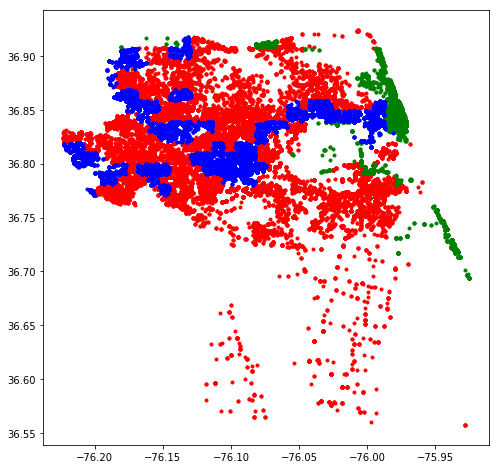

<Figure size 2880x2880 with 0 Axes>

In [76]:
d1 = data[Kmodel.labels_==0]
plt.plot(d1['Longitude'],d1['Lattitude'],'r.')
d2 = data[Kmodel.labels_==1]
plt.plot(d2['Longitude'],d2['Lattitude'],'g.')
d3 = data[Kmodel.labels_==2]
plt.plot(d3['Longitude'],d3['Lattitude'],'b.')
d4 = data[Kmodel.labels_==3]
plt.plot(d4['Longitude'],d4['Lattitude'],'y.')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.figure(figsize=(40,40))
plt.show()

In [51]:
police_ck=pd.merge(police,one_hot,how='left',left_index=True,right_index=True)
police_ck = police_ck.drop(['Type','Date_Occured'],axis = 1)
police_ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80292 entries, 0 to 80291
Data columns (total 30 columns):
Lattitude                    80292 non-null float64
Longitude                    80292 non-null float64
Time_Intrvl                  80292 non-null int64
average                      80292 non-null float64
population                   80292 non-null int64
median                       80292 non-null float64
household                    80292 non-null int64
area                         80292 non-null int64
population_density           80292 non-null float64
population_distribution      80292 non-null float64
age_distribution             80292 non-null float64
sex_distribution             80292 non-null float64
population_perhoushold       80292 non-null float64
family_density               80292 non-null float64
vacant_rate                  80292 non-null float64
rent_rate                    80292 non-null float64
ASSAULT                      80292 non-null float64
COUNTERFEITING/

In [52]:

data11 = police_ck
data11 = pd.DataFrame(data11,index=police_zs.index) 
d1 = data11[Kmodel.labels_==0]
d2 = data11[Kmodel.labels_==1]
d3 = data11[Kmodel.labels_==2]
#d4 = data11[Kmodel.labels_==3]
cluster1 = d1
cluster1.mean()

Lattitude                    3.682175e+01
Longitude                   -7.610521e+01
Time_Intrvl                  4.990339e+02
average                      3.559360e+05
population                   4.803362e+03
median                       3.821677e+01
household                    1.733466e+03
area                         7.926330e+06
population_density           1.338638e+00
population_distribution      7.262534e-01
age_distribution             7.582972e-01
sex_distribution             4.897585e-01
population_perhoushold       2.806029e+00
family_density               7.529311e-01
vacant_rate                  4.628752e-02
rent_rate                    2.338650e-01
ASSAULT                      2.322438e-01
COUNTERFEITING/ FORGERY      1.197207e-02
CRUELTY TO ANIMALS           8.123901e-03
DESTRUCTION OF PROPERTY      1.059195e-01
DRUG VIOLATIONS              9.245095e-02
FRAUD                        8.487339e-02
HARASSING COMMUNICATION      3.014395e-02
LARCENY                      3.202

In [53]:
cluster2 = d2
cluster2.mean()

Lattitude                    3.684368e+01
Longitude                   -7.598252e+01
Time_Intrvl                  2.631818e+02
average                      1.294993e+04
population                   3.474258e+03
median                       4.130563e+01
household                    1.664036e+03
area                         3.529015e+06
population_density           1.532674e+00
population_distribution      8.715633e-01
age_distribution             8.515823e-01
sex_distribution             5.312674e-01
population_perhoushold       3.253725e+00
family_density               4.731806e-01
vacant_rate                  3.738503e-01
rent_rate                    5.142540e-01
ASSAULT                      2.539803e-01
COUNTERFEITING/ FORGERY      9.639337e-03
CRUELTY TO ANIMALS           3.790751e-03
DESTRUCTION OF PROPERTY      9.130294e-02
DRUG VIOLATIONS              1.632189e-01
FRAUD                        5.556157e-02
HARASSING COMMUNICATION      1.917037e-02
LARCENY                      2.913

In [92]:
a = pd.DataFrame(cluster1.mean())
b = pd.DataFrame(cluster2.mean())
c= pd.DataFrame(cluster3.mean())
a[1]=b[0]
a[2]=c[0]

In [93]:
a

,0,1,2
Lattitude,3.682175e+01,3.684368e+01,3.683173e+01
Longitude,-7.610521e+01,-7.598252e+01,-7.610973e+01
Time_Intrvl,4.990339e+02,2.631818e+02,4.402597e+02
average,3.559360e+05,1.294993e+04,2.408693e+05
population,4.803362e+03,3.474258e+03,5.774805e+03
median,3.821677e+01,4.130563e+01,3.002627e+01
household,1.733466e+03,1.664036e+03,2.299534e+03
area,7.926330e+06,3.529015e+06,2.915567e+06
population_density,1.338638e+00,1.532674e+00,2.363366e+00
population_distribution,7.262534e-01,8.715633e-01,5.201594e-01


In [54]:
police_output=pd.merge(police,one_hot,how='left',left_index=True,right_index=True)
police_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80292 entries, 0 to 80291
Data columns (total 32 columns):
Date_Occured                 80292 non-null object
Lattitude                    80292 non-null float64
Longitude                    80292 non-null float64
Type                         80292 non-null object
Time_Intrvl                  80292 non-null int64
average                      80292 non-null float64
population                   80292 non-null int64
median                       80292 non-null float64
household                    80292 non-null int64
area                         80292 non-null int64
population_density           80292 non-null float64
population_distribution      80292 non-null float64
age_distribution             80292 non-null float64
sex_distribution             80292 non-null float64
population_perhoushold       80292 non-null float64
family_density               80292 non-null float64
vacant_rate                  80292 non-null float64
rent_rate        

In [55]:
cluster3 = d3
cluster3.mean()

Lattitude                    3.683173e+01
Longitude                   -7.610973e+01
Time_Intrvl                  4.402597e+02
average                      2.408693e+05
population                   5.774805e+03
median                       3.002627e+01
household                    2.299534e+03
area                         2.915567e+06
population_density           2.363366e+00
population_distribution      5.201594e-01
age_distribution             7.555567e-01
sex_distribution             4.786603e-01
population_perhoushold       2.518105e+00
family_density               6.116671e-01
vacant_rate                  7.261804e-02
rent_rate                    5.408846e-01
ASSAULT                      2.450882e-01
COUNTERFEITING/ FORGERY      8.425123e-03
CRUELTY TO ANIMALS           8.252477e-03
DESTRUCTION OF PROPERTY      1.246159e-01
DRUG VIOLATIONS              9.305618e-02
FRAUD                        6.132385e-02
HARASSING COMMUNICATION      2.838300e-02
LARCENY                      3.165

In [56]:
cluster4 = d4
cluster4.mean()

Lattitude                   NaN
Longitude                   NaN
Time_Intrvl                 NaN
average                     NaN
population                  NaN
median                      NaN
household                   NaN
area                        NaN
population_density          NaN
population_distribution     NaN
age_distribution            NaN
sex_distribution            NaN
population_perhoushold      NaN
family_density              NaN
vacant_rate                 NaN
rent_rate                   NaN
ASSAULT                     NaN
COUNTERFEITING/ FORGERY     NaN
CRUELTY TO ANIMALS          NaN
DESTRUCTION OF PROPERTY     NaN
DRUG VIOLATIONS             NaN
FRAUD                       NaN
HARASSING COMMUNICATION     NaN
LARCENY                     NaN
Others                      NaN
ROBBERY                     NaN
TRESPASS OF REAL PROPERTY   NaN
UNAUTHORIZED USE OF AUTO    NaN
VIOLATE PROTECTIVE ORDER    NaN
WEAPON LAW VIOLATIONS       NaN
dtype: float64

In [57]:
data11 = police_output
data11 = pd.DataFrame(data11,index=police_output.index) 
d1 = data11[Kmodel.labels_==0]
d2 = data11[Kmodel.labels_==1]
d3 = data11[Kmodel.labels_==2]
#d4 = data11[Kmodel.labels_==3]

d1.to_csv('d1.csv')
d2.to_csv('d2.csv')
d3.to_csv('d3.csv')
#d4.to_csv('d4.csv')

In [29]:
d1.head()

,Date_Occured,Lattitude,Longitude,Type,Time_Intrvl,average,population,median,household,area,...,DRUG VIOLATIONS,FRAUD,HARASSING COMMUNICATION,LARCENY,Others,ROBBERY,TRESPASS OF REAL PROPERTY,UNAUTHORIZED USE OF AUTO,VIOLATE PROTECTIVE ORDER,WEAPON LAW VIOLATIONS
0,2017-01-08 17:00:00,36.848522,-75.990597,DESTRUCTION OF PROPERTY,215,0.00000,6587,29.8,2804,6555252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-07-23 21:00:00,36.838597,-76.070625,DESTRUCTION OF PROPERTY,20,0.00000,4549,29.1,1937,1913514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2017-10-18 18:00:00,36.906650,-76.141786,LARCENY,14,297616.41791,4334,29.8,1976,1992953,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-05-20 04:40:00,36.809335,-76.121166,Others,1,158540.28021,7772,29.6,2722,2433021,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,2016-10-27 22:50:00,36.842029,-75.993452,LARCENY,0,0.00000,6587,29.8,2804,6555252,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sum(d2['Others'])

7098.0

In [ ]:
d1 = data[Kmodel.labels_==0]
plt.plot(d1['population_perhoushold'],d1['rent_rate'],'r.')
d2 = data[Kmodel.labels_==1]
plt.plot(d2['population_perhoushold'],d2['rent_rate'],'go')
d3 = data[Kmodel.labels_==2]
plt.plot(d3['population_perhoushold'],d3['rent_rate'],'b*')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.figure(figsize=(40,40))
plt.show()

In [15]:
time_data = []
x = []
for i in range(0,24):
    dd = d1.copy()
    dd = dd.rename(index = str, columns = {"Date Occured":"Time"})
    dd = dd[dd.Time== i]
    time_data.insert(i,len(dd))
    x.insert(i,i)
print(time_data)
print(x)
import matplotlib.pyplot as plt
plt.plot(x,time_data)

AttributeError: 'DataFrame' object has no attribute 'Time'

In [ ]:
time_data = []
x = []
for i in range(0,24):
    dd = d2.copy()
    dd = dd.rename(index = str, columns = {"Date Occured":"Time"})
    dd = dd[dd.Time== i]
    time_data.insert(i,len(dd))
    x.insert(i,i)
print(time_data)
print(x)
import matplotlib.pyplot as plt
plt.plot(x,time_data)

In [ ]:
time_data = []
x = []
for i in range(0,24):
    dd = d3.copy()
    dd = dd.rename(index = str, columns = {"Date Occured":"Time"})
    dd = dd[dd.Time== i]
    time_data.insert(i,len(dd))
    x.insert(i,i)
print(time_data)
print(x)
import matplotlib.pyplot as plt
plt.plot(x,time_data)